In [55]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf 
import numpy as np

In [56]:
Toyota=pd.read_csv("E:/Ravi_ExcelR_Assignments/Multiple Linear Regression/ToyotaCorolla.csv",encoding='windows-1252')
Toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [57]:
Toyota.shape 

(1436, 38)

In [58]:
Toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [59]:
#considering only "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"
Toyota_data=Toyota.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Toyota_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [60]:
#checking null values
Toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [61]:
#check for missing values
Toyota_data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [62]:
Toyota_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [63]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Toyota_data).fit()

In [64]:
#Coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:12:57   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [13]:
#cc and Doors p values are >0.05 so insignificant

In [67]:
#Price on cc
Price_cc=smf.ols('Price~cc',data = Toyota_data).fit()  
#t and p-Values
print(Price_cc.tvalues, '\n', Price_cc.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [68]:
#Price on Doors
Price_doors=smf.ols('Price~Doors',data = Toyota_data).fit()  
#t and p-Values
print(Price_doors.tvalues, '\n', Price_doors.pvalues) 

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [69]:
#Together
Price_ccdoors=smf.ols('Price~cc+Doors',data = Toyota_data).fit()  
#t and p-Values
print(Price_ccdoors.tvalues, '\n', Price_ccdoors.pvalues) 

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


In [46]:
#individually and together cc and doors are significant as p value<0.05

In [47]:
#Checking the Varaince Inflation Factor

In [70]:
rsq_age=smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=Toyota_data).fit().rsquared
vif_age=1/(1-rsq_age)
vif_age

1.8846198056602865

In [71]:
rsq_km=smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=Toyota_data).fit().rsquared
vif_km=1/(1-rsq_km)
vif_km

1.7569047782042881

In [72]:
rsq_hp=smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=Toyota_data).fit().rsquared
vif_hp=1/(1-rsq_hp)
vif_hp

1.4194221086310972

In [73]:
rsq_cc=smf.ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=Toyota_data).fit().rsquared
vif_cc=1/(1-rsq_cc)
vif_cc

1.1638939849423793

In [74]:
rsq_dr=smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=Toyota_data).fit().rsquared
vif_dr=1/(1-rsq_dr)
vif_dr

1.1565752070760436

In [75]:
rsq_gr=smf.ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=Toyota_data).fit().rsquared
vif_gr=1/(1-rsq_gr)
vif_gr

1.0987230193470368

In [76]:
rsq_qt=smf.ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data=Toyota_data).fit().rsquared
vif_qt=1/(1-rsq_qt)
vif_qt

2.311430811531038

In [77]:
rsq_wt=smf.ols("Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=Toyota_data).fit().rsquared
vif_wt=1/(1-rsq_wt)
vif_wt

2.516419837445868

In [25]:
#VIF high for Weight

In [26]:
#cooks distance calculation
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<ipython-input-27-6ae3a3facd7c>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Toyota_data)), np.round(c, 3))


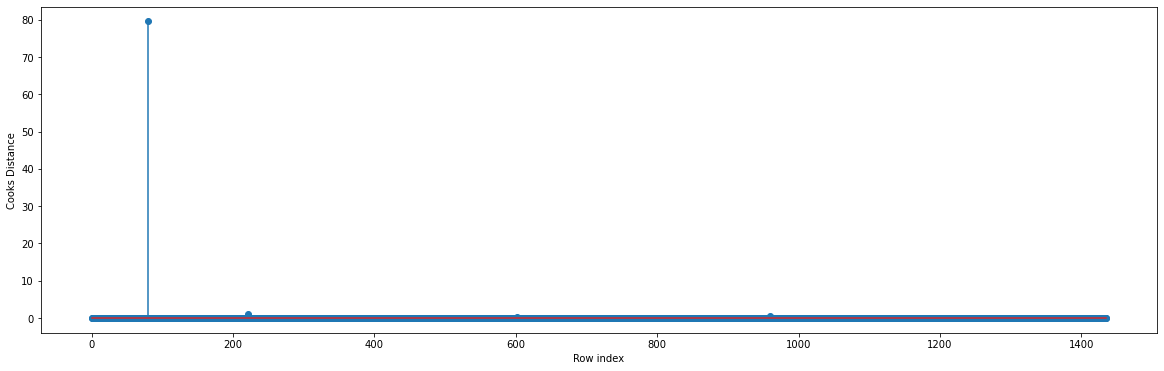

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 6))
plt.stem(np.arange(len(Toyota_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
#index and value of influencer where c is more than 1
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

In [29]:
# 80th observations lies >1 so its influencing the data points

In [32]:
Toyota_data[Toyota_data.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [33]:
#See the differences in price and other variable values
Toyota_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [34]:
#improving the model

In [38]:
Toyota_new=Toyota_data.copy()

In [39]:
Toyota_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [40]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Toyota1=Toyota_new.drop(Toyota_new.index[[80]],axis=0).reset_index()
Toyota1 

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [41]:
#Drop the original index
Toyota1=Toyota1.drop(['index'],axis=1)
Toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [86]:
#Build model except cc and Doors as pvlaue >0.05 and generate rsquared and AIC

In [100]:
#Build model except cc 
final_t_cc= smf.ols('Price~Age_08_04+KM+HP+Weight+Doors+Gears+Quarterly_Tax',data = Toyota1).fit()

In [101]:
(final_t_cc.rsquared,final_t_cc.aic)

(0.8631959819380925, 24751.649416173997)

In [102]:
final_t_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1286.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:29:15   Log-Likelihood:                -12368.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5434.8906   1410.637     -3.853      0.000   -8202.036   -2667.745
Age_08_04      -121.6865      2.616    -46.512      0.000    -126.819    -116.554
KM               -0.0209      0.001    -16.737      0.000      -0.023      -0.018
HP               31.3562      2.807     11.170      0.000      25.850      36.863
Weight           16.6824      1.056     15.802      0.000      14.612      18.753
Doors            -1.0602     40.013     -0.026      0.979     -79.551      77.430
Gears           598.5410    197.089      3.037      0.002     211.925     985.157
Quarterly_Tax     3.7658      1.301      2.894      0.004       1.214       6.318
==============================================================================
Omnibus:                      146.861   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.897
Skew:                          -0.200   Prob(JB):                    3.64e-209
Kurtosis:                       6.987   Cond. No.                     3.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#Build model except Doors as pvlaue >0.05 

In [147]:
final_t_dr= smf.ols('Price~Age_08_04+KM+HP+Weight+Gears+Quarterly_Tax+cc',data = Toyota1).fit()

In [148]:
(final_t_dr.rsquared,final_t_dr.aic)

(0.8693349475698541, 24685.765438793034)

In [149]:
final_t_dr.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:07:05   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
#Doors aic is low and rsquared is high as compared to cc , so Doors can be removed

In [150]:
model_influence_cc = final_t_dr.get_influence()
(c_cc, _) = model_influence_cc.cooks_distance

<ipython-input-151-cceff547738c>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Toyota1)),np.round(c_cc,3));


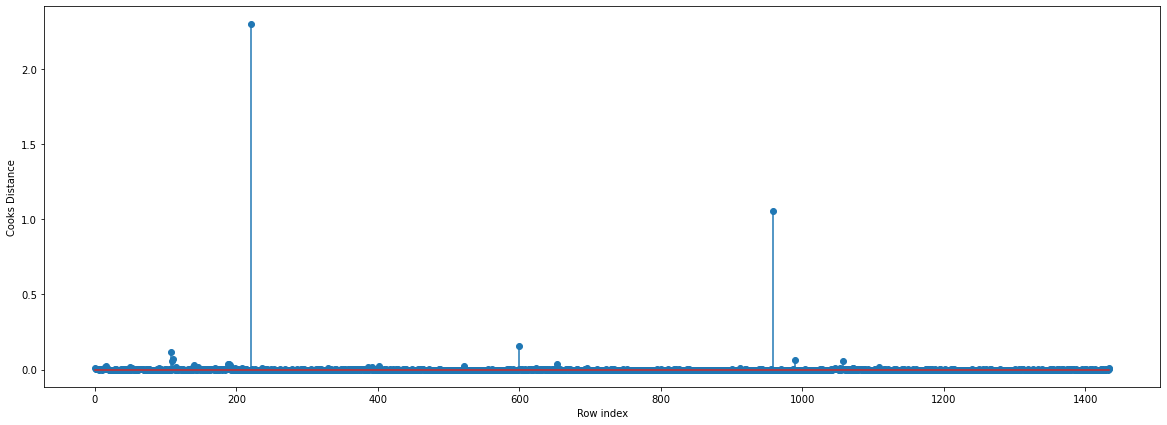

In [151]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyota1)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [152]:
#index of the max data points 
(np.argmax(c_cc),np.max(c_cc))

(220, 2.3034451664541082)

In [153]:
#Drop 220 observations
Toyota2=Toyota1.drop(Toyota1.index[[220]],axis=0) 

In [154]:
Toyota2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [155]:
#Reset the index and re arrange the row values
Toyota3=Toyota2.reset_index()

In [156]:
Toyota4=Toyota3.drop(['index'],axis=1)
Toyota4

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [157]:
#building model
final_t_wodr= smf.ols('Price~Age_08_04+KM+HP+Weight+Gears+Quarterly_Tax+cc',data = Toyota4).fit()

In [158]:
final_t_wodr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1461.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:08:11   Log-Likelihood:                -12280.
No. Observations:                1434   AIC:                         2.458e+04
Df Residuals:                    1426   BIC:                         2.462e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1396.680     -7.341      0.000    -1.3e+04   -7513.393
Age_08_04      -116.6516      2.510    -46.479      0.000    -121.575    -111.728
KM               -0.0174      0.001    -14.074      0.000      -0.020      -0.015
HP               38.8496      2.806     13.845      0.000      33.345      44.354
Weight           24.4820      1.139     21.492      0.000      22.247      26.717
Gears           547.0112    183.189      2.986      0.003     187.663     906.360
Quarterly_Tax     8.0610      1.382      5.832      0.000       5.349      10.773
cc               -3.1527      0.304    -10.384      0.000      -3.748      -2.557
==============================================================================
Omnibus:                      181.376   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.005
Skew:                          -0.277   Prob(JB):                         0.00
Kurtosis:                       7.944   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
#checking influencing observation by cooks distance
model_influence_wodr = final_t_wodr.get_influence()
(c_wodr, _) = model_influence_wodr.cooks_distance

<ipython-input-160-50e6a1011271>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Toyota4)),np.round(c_wodr,3));


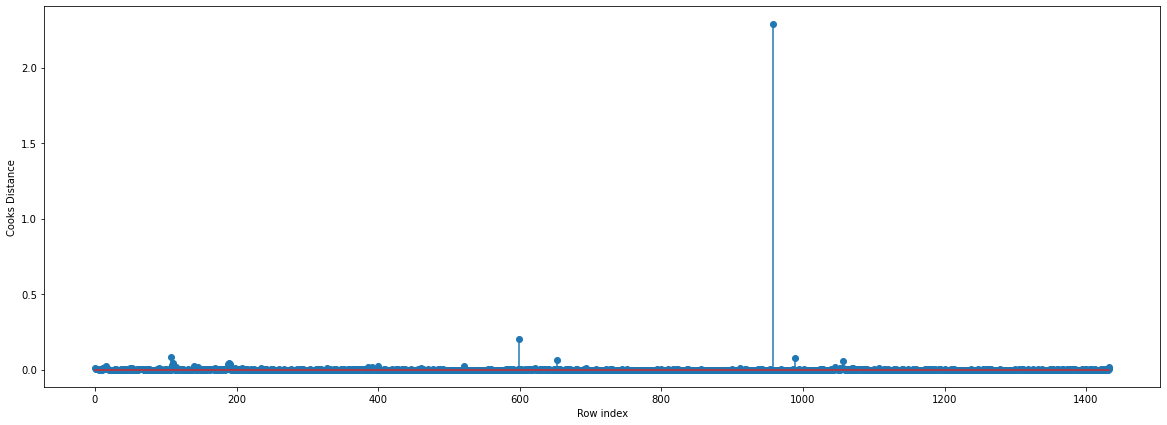

In [160]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyota4)),np.round(c_wodr,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [163]:
#index of the data points where c is more than 1
(np.argmax(c_wodr),np.max(c_wodr))

(958, 2.2907159163044333)

In [166]:
#Drop 958 observations
Toyota5=Toyota4.drop(Toyota4.index[[958]],axis=0) 
Toyota5

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [167]:
#Reset the index and re arrange the row values
Toyota6=Toyota5.reset_index()
Toyota6

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1429,7500,69,20544,86,1300,3,5,69,1025
1429,1430,10845,72,19000,86,1300,3,5,69,1015
1430,1431,8500,71,17016,86,1300,3,5,69,1015
1431,1432,7250,70,16916,86,1300,3,5,69,1015


In [168]:
Toyota7=Toyota6.drop(['index'],axis=1)
Toyota7

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [169]:
#building model
final_t_wodr1= smf.ols('Price~Age_08_04+KM+HP+Weight+Gears+Quarterly_Tax+cc',data = Toyota7).fit()

In [170]:
final_t_wodr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1556.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:13:37   Log-Likelihood:                -12231.
No. Observations:                1433   AIC:                         2.448e+04
Df Residuals:                    1425   BIC:                         2.452e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.45e+04   1435.850    -10.098      0.000   -1.73e+04   -1.17e+04
Age_08_04      -112.4015      2.485    -45.237      0.000    -117.276    -107.527
KM               -0.0172      0.001    -14.328      0.000      -0.020      -0.015
HP               35.9449      2.747     13.084      0.000      30.556      41.334
Weight           29.2975      1.227     23.872      0.000      26.890      31.705
Gears           579.2745    178.171      3.251      0.001     229.769     928.780
Quarterly_Tax     5.5368      1.372      4.034      0.000       2.845       8.229
cc               -3.6665      0.301    -12.198      0.000      -4.256      -3.077
==============================================================================
Omnibus:                      109.903   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.356
Skew:                          -0.060   Prob(JB):                    1.41e-124
Kurtosis:                       6.088   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [171]:
#checking influencing observation by cooks distance
model_influence_wodr1 = final_t_wodr1.get_influence()
(c_wodr1, _) = model_influence_wodr1.cooks_distance

<ipython-input-172-7a6ed1d4af46>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Toyota7)),np.round(c_wodr1,3));


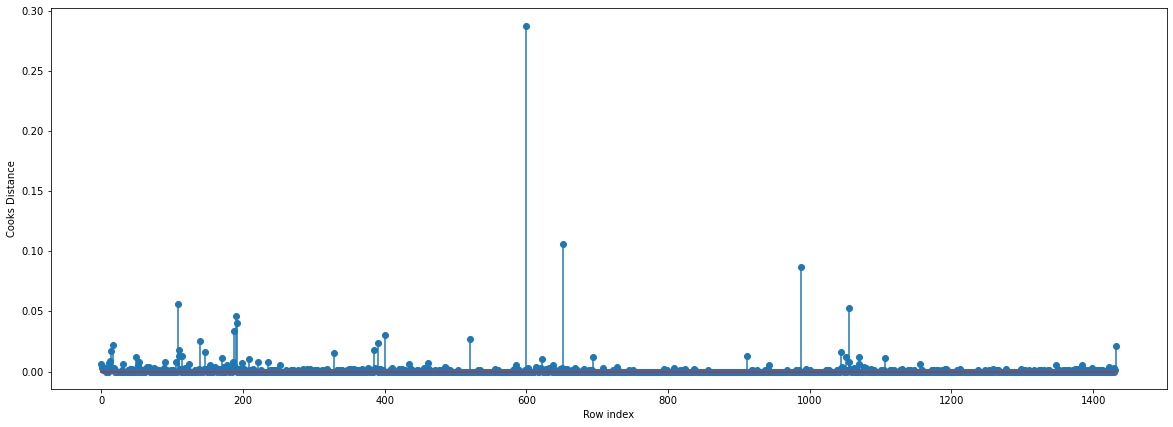

In [172]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyota7)),np.round(c_wodr1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [173]:
#index of the data points where c is more than 1
(np.argmax(c_wodr1),np.max(c_wodr1))

(599, 0.28772293638956176)

In [ ]:
#we can stop as no influencing observations with 88.4% accuracy model